In [11]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics.cluster import homogeneity_score, completeness_score
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from kneed import KneeLocator
%matplotlib inline

ModuleNotFoundError: No module named 'numpy'

In [10]:
path = "/Users/adriannapinzariu/Desktop/LIDC_newMode_2022 (1).csv"

In [3]:
df = pd.read_csv(path)

NameError: name 'pd' is not defined

In [4]:
# Drop non-numeric columns
df = df.select_dtypes(include=['float', 'int'])

# Drop rows with NaN values
df = df.dropna()

NameError: name 'df' is not defined

In [5]:
# use DataFrame.loc[] method to filter the columns
sortByDf = df.loc[:, ['Malignancy', 'Spiculation']]

# print the resulting dataframe
print(sortByDf)

NameError: name 'df' is not defined

In [6]:
df = df.drop(['RadiologistID', 'Subtlety_1', 'InternalStructure_1', 'Sphericity_1', 'Margin_1', 'Lobulation_1', 'Spiculation_1', 'Texture_1', 'Malignancy_1', 'Subtlety_2', 'InternalStructure_2', 'Sphericity_2', 'Margin_2', 'Lobulation_2', 'Spiculation_2', 'Texture_2', 'Malignancy_2', 'Subtlety_3', 'InternalStructure_3', 'Sphericity_3', 'Margin_3', 'Lobulation_3', 'Spiculation_3', 'Texture_3', 'Malignancy_3', 'Subtlety_4', 'InternalStructure_4', 'Sphericity_4', 'Margin_4', 'Lobulation_4', 'Spiculation_4', 'Texture_4', 'Malignancy_4', 'Subtlety', 'InternalStructure', 'Sphericity', 'Margin', 'Lobulation', 'Spiculation', 'Texture'], axis=1)

NameError: name 'df' is not defined

In [7]:
df = df.drop(['Calcification_1', 'Calcification_2', 'Calcification_3', 'Calcification_4', 'Calcification'], axis = 1)

NameError: name 'df' is not defined

In [8]:
df = df.drop(['Malignancy', 'noduleID', 'InstanceID', 'imageZposition', 'PixelSpacing', 'PixelArea','SecondMoment', 'SuperscribedDiameter'], axis = 1)

NameError: name 'df' is not defined

In [9]:
df.columns

Index(['Area', 'ConvexArea', 'Perimeter', 'ConvexPerimeter', 'EquivDiameter',
       'MajorAxisLength', 'MinorAxisLength', 'Elongation', 'Compactness',
       'Eccentricity', 'Solidity', 'Extent', 'Circularity', 'RadialDistanceSD',
       'Roughness', 'MinIntensity', 'MaxIntensity', 'MeanIntensity',
       'SDIntensity', 'MinIntensityBG', 'MaxIntensityBG', 'MeanIntensityBG',
       'SDIntensityBG', 'IntensityDifference', 'markov1', 'markov2', 'markov3',
       'markov4', 'markov5', 'gabormean_0_0', 'gaborSD_0_0', 'gabormean_0_1',
       'gaborSD_0_1', 'gabormean_0_2', 'gaborSD_0_2', 'gabormean_1_0',
       'gaborSD_1_0', 'gabormean_1_1', 'gaborSD_1_1', 'gabormean_1_2',
       'gaborSD_1_2', 'gabormean_2_0', 'gaborSD_2_0', 'gabormean_2_1',
       'gaborSD_2_1', 'gabormean_2_2', 'gaborSD_2_2', 'gabormean_3_0',
       'gaborSD_3_0', 'gabormean_3_1', 'gaborSD_3_1', 'gabormean_3_2',
       'gaborSD_3_2', 'Contrast', 'Correlation', 'Energy', 'Homogeneity',
       'Entropy', 'x_3rdordermoment

In [10]:
df.head()

,Area,ConvexArea,Perimeter,ConvexPerimeter,EquivDiameter,MajorAxisLength,MinorAxisLength,Elongation,Compactness,Eccentricity,...,Correlation,Energy,Homogeneity,Entropy,x_3rdordermoment,Inversevariance,Sumaverage,Variance,Clustertendency,MaxProbability
0,1094,1286,168.852814,135.372918,37.321898,42.803687,35.834900,1.194469,2.073908,0.546909,...,0.894,0.0003,0.0532,8.15,1290000,0.0223,661.0,143000,541000,0.0009
1,918,951,121.840620,116.923682,34.188213,42.015647,28.631957,1.467439,1.286861,0.731856,...,0.781,0.0005,0.0567,7.76,11100000,0.0221,260.0,32700,115000,0.0012
2,931,1062,148.267027,119.799290,34.429435,39.635819,30.844618,1.285016,1.879012,0.628016,...,0.899,0.0004,0.0572,8.03,735000,0.0247,416.0,111000,420000,0.0010
3,161,167,51.455844,49.201081,14.317527,18.125068,11.574663,1.565926,1.308681,0.769539,...,0.692,0.0027,0.0312,6.03,-469000,0.0107,420.0,98700,333000,0.0043
4,246,251,58.769553,57.721132,17.697936,18.324991,17.321312,1.057945,1.117274,0.326408,...,0.793,0.0018,0.0764,6.43,8600000,0.0392,565.0,137000,492000,0.0052


In [11]:
df.shape

(2622, 64)

In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [13]:
scaler=StandardScaler()
scaler.fit(df)
scaler_data=scaler.transform(df)

In [14]:
scaler_data

array([[ 2.96825716,  3.11302878,  3.38696964, ...,  0.17649608,
         0.32163175, -1.25984484],
       [ 2.39071677,  2.14352372,  2.04572419, ..., -0.56311557,
        -0.5542773 , -1.20480766],
       [ 2.433376  ,  2.46476271,  2.79966259, ..., -0.03807847,
         0.07284068, -1.24149912],
       ...,
       [-0.42479265, -0.43217627, -0.57327674, ..., -0.66369739,
        -0.69203765,  0.62976499],
       [ 0.5268364 ,  0.48234193,  0.73622372, ..., -0.02466756,
         0.06461618, -0.92962176],
       [-0.37228898, -0.3887656 , -0.4868477 , ..., -0.39212648,
        -0.37539447,  0.75818508]])

In [15]:
pca = PCA(n_components = 2, svd_solver = 'auto')
principal_components = pca.fit(scaler_data)
x_pca = pca.transform(scaler_data)

In [16]:
#scaler_data.shape
#x_pca.shape  
#scaler_data # show data before scaling
#x_pca # show data after scaling

In [17]:
#pca = PCA(n_components = scaler_data.shape[1], svd_solver = 'auto')
pca.fit(scaler_data)

# Get the explained variance ratios of the principal components
exp_var = pca.explained_variance_ratio_

# Calculate the cumulative sum of explained variances
cum_exp_var = np.cumsum(exp_var)

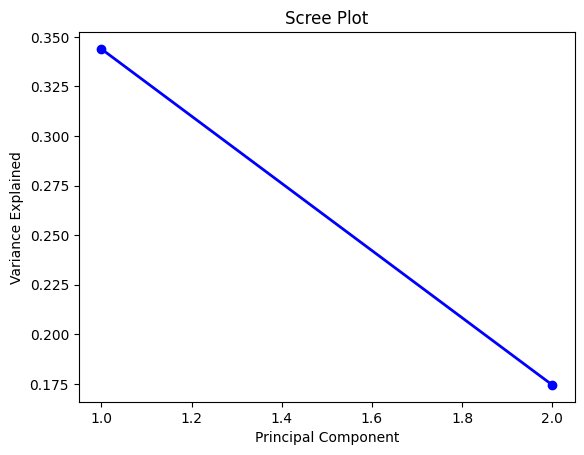

In [18]:
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

In [19]:
# Find the elbow point
kneedle = KneeLocator(PC_values, pca.explained_variance_ratio_, S=1.0, curve='convex', direction='decreasing')
elbow = kneedle.elbow

print(elbow)

None


/opt/homebrew/Caskroom/miniforge/base/lib/python3.10/site-packages/kneed/knee_locator.py:311: UserWarning: No knee/elbow found
  warnings.warn("No knee/elbow found")


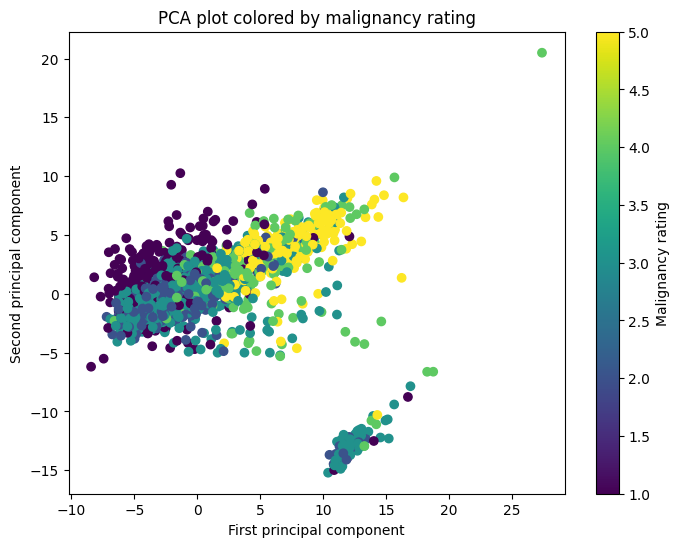

In [20]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0], x_pca[:,1], c=sortByDf['Malignancy'])
plt.title('PCA plot colored by malignancy rating')
plt.xlabel('First principal component')
plt.ylabel('Second principal component')
plt.colorbar(label='Malignancy rating')
plt.show()

In [21]:
# component loadings or weights (correlation coefficient between original variables and the component) 
# component loadings represents the elements of the eigenvector
# the squared loadings within the PCs always sums to 1
loadings = principal_components.components_
num_pc = principal_components.n_components_
pc_list = ["PC"+str(i) for i in list(range(1, num_pc+1))]
loadings_df = pd.DataFrame.from_dict(dict(zip(pc_list, loadings)))
loadings_df['variable'] = df.columns.values
loadings_df = loadings_df.set_index('variable')
loadings_df

,PC1,PC2
variable,,
Area,0.137370,0.136752
ConvexArea,0.141675,0.141328
Perimeter,0.163528,0.156559
ConvexPerimeter,0.167058,0.158368
EquivDiameter,0.165064,0.154636
...,...,...
Inversevariance,0.108906,0.039971
Sumaverage,0.022171,0.156624
Variance,-0.010314,0.110467


In [22]:
# select only the first 10 rows of the loadings dataframe
loadings_df = loadings_df.iloc[:10, :]

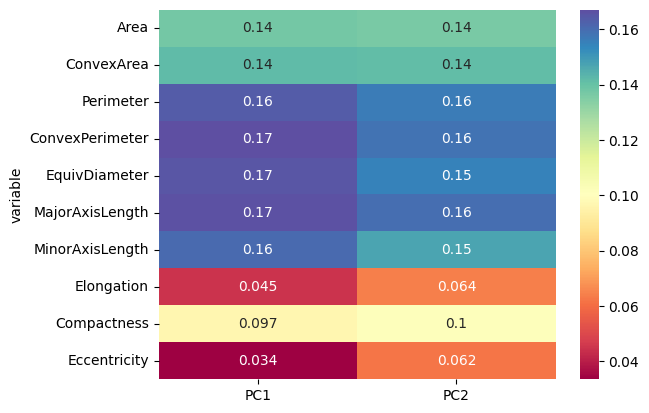

In [23]:
# get correlation matrix plot for loadings
ax = sns.heatmap(loadings_df, annot=True, cmap='Spectral')
plt.show()

In [50]:
# Compute the covariance matrix, eigenvalues, cumulative explained variance ratio
cov_matrix = np.cov(x_pca.T)
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
explained_variance_ratio2 = np.cumsum(eigenvalues) / np.sum(eigenvalues)

In [51]:
k = np.argmax(explained_variance_ratio2 >= 0.85) + 1
print("Minimum number of principal components that explain at least 85% of the variance:", k)

Minimum number of principal components that explain at least 85% of the variance: 2


In [24]:
# Set up lists to store distortions and inertias
distortions = []
inertias = []

In [25]:
# Set up dictionaries to store mappings
mapping1 = {}
mapping2 = {}

In [26]:
# Set up range of k values to test
K = range(2, 13)

In [27]:
# Loop through each k value
for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(df)
    kmeanModel.fit(df)
  
    # Calculate distortion and inertia
    distortions.append(sum(np.min(cdist(df, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / df.shape[0])
    inertias.append(kmeanModel.inertia_)
  
    # Store distortion and inertia mappings
    mapping1[k] = sum(np.min(cdist(df, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / df.shape[0]
    mapping2[k] = kmeanModel.inertia_

/opt/homebrew/Caskroom/miniforge/base/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly t

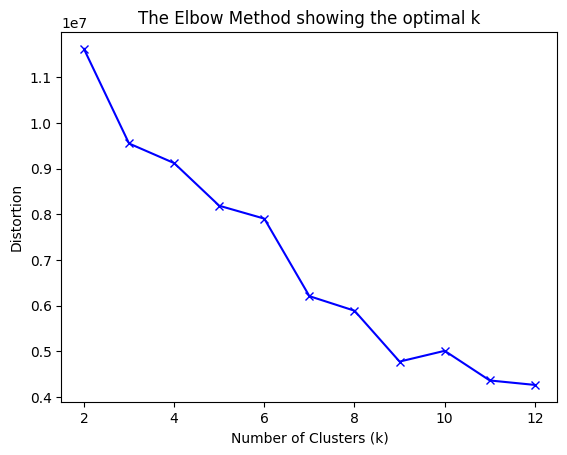

In [28]:
# Plot the elbow curve
plt.plot(K, distortions, 'bx-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [29]:
# Use kneed to find the elbow point
kneedle = KneeLocator(K, distortions, S=1.0, curve='convex', direction='decreasing')
elbow = kneedle.elbow

In [30]:
# Print the index of the elbow point
print("The elbow point is at index", elbow)

The elbow point is at index 9


In [31]:
# K~Means for Distortion and Intertia Scores at K=9

# Set k=9
K = [9]

# Loop through each k value
for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(df)
    kmeanModel.fit(df)
  
    # Calculate distortion and inertia
    distortions.append(sum(np.min(cdist(df, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / df.shape[0])
    inertias.append(kmeanModel.inertia_)
  
    # Store distortion and inertia mappings
    mapping1[k] = sum(np.min(cdist(df, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / df.shape[0]
    mapping2[k] = kmeanModel.inertia_

/opt/homebrew/Caskroom/miniforge/base/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [32]:
# K~Means for Homogeneity and Completeness at K=9

# Set range of K values to try
K = [9]

# Initialize empty lists to store scores
homogeneity_scores = []
completeness_scores = []
distortions = []

# Loop through each k value
for k in K:
    # Building and fitting the model
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df)
  
    # Compute distortion, homogeneity, and completeness scores
    distortions.append(kmeans.inertia_)
    homogeneity_scores.append(homogeneity_score(y_true, kmeans.labels_))
    completeness_scores.append(completeness_score(y_true, kmeans.labels_))

/opt/homebrew/Caskroom/miniforge/base/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


NameError: name 'y_true' is not defined

In [ ]:
#Plot elbow curve to determine K value
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('Elbow Method For Optimal k')
plt.show()

In [ ]:
# Get optimal K value based on elbow curve
optimal_k = # manually determine based on elbow curve

# Fit KMeans with optimal K value
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(X)

# Compute homogeneity and completeness scores for resulting clusters
homogeneity = homogeneity_score(y_true, kmeans.labels_)
completeness = completeness_score(y_true, kmeans.labels_)

# Print scores
print("Homogeneity score:", homogeneity)
print("Completeness score:", completeness)